<a href="https://colab.research.google.com/github/HromovAndrey/II_Homework_mooD_3/blob/main/%D0%94%D0%97_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/possum.csv")

In [3]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# Завдання 1
Виведіть основні числові характеристики для числових ознак

In [4]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# Завдання 2
Проаналізуйте стовпчик `case`, чи є він інформативним?

In [5]:
case_info = df['case'].describe()
unique_cases = df['case'].nunique()
print(case_info)
print(unique_cases)

count    104.000000
mean      52.500000
std       30.166206
min        1.000000
25%       26.750000
50%       52.500000
75%       78.250000
max      104.000000
Name: case, dtype: float64
104


# Завдання 3
Очистіть дані від викидів. Виведіть очищений датафрейм

In [6]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    cleaned_df = remove_outliers(df.select_dtypes(include=[float, int]))
    cleaned_df = pd.concat([cleaned_df, df[['case', 'site', 'Pop', 'sex']]], axis=1)
cleaned_df = cleaned_df.dropna().reset_index(drop=True)
print(cleaned_df)

NameError: name 'cleaned_df' is not defined

# Завдання 4
Намалюйте матрицб кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму.

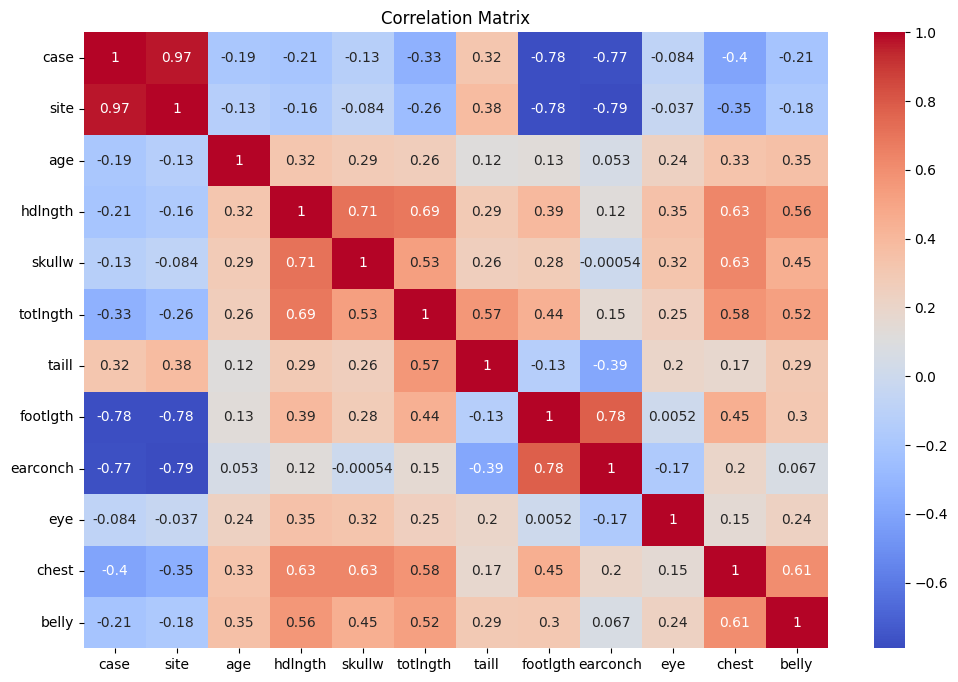

Most correlated features:
site  case    0.970353
dtype: float64


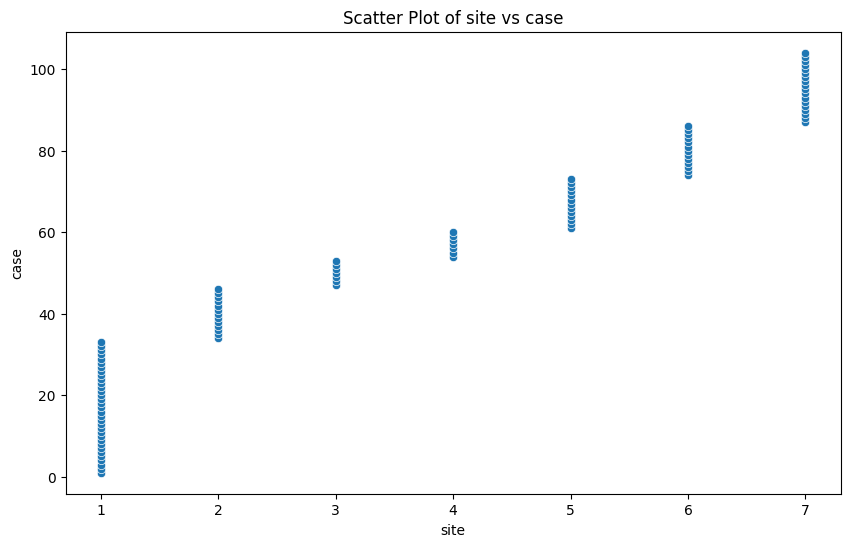

In [11]:
numeric_df = df.select_dtypes(include=[float, int])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
most_corr = corr_matrix.unstack().sort_values(ascending=False)
most_corr = most_corr[most_corr != 1].drop_duplicates()
print("Most correlated features:")
print(most_corr.head(1))
most_corr_feature_pair = most_corr.head(1).index[0]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=most_corr_feature_pair[0], y=most_corr_feature_pair[1])
plt.title(f'Scatter Plot of {most_corr_feature_pair[0]} vs {most_corr_feature_pair[1]}')
plt.show()

# Завдання 5
Для 4-ох числових ознак на вибір намалюйте ящики з вусами згрупованими по статі. Подумайте чи є вплив статі на розміри опосума

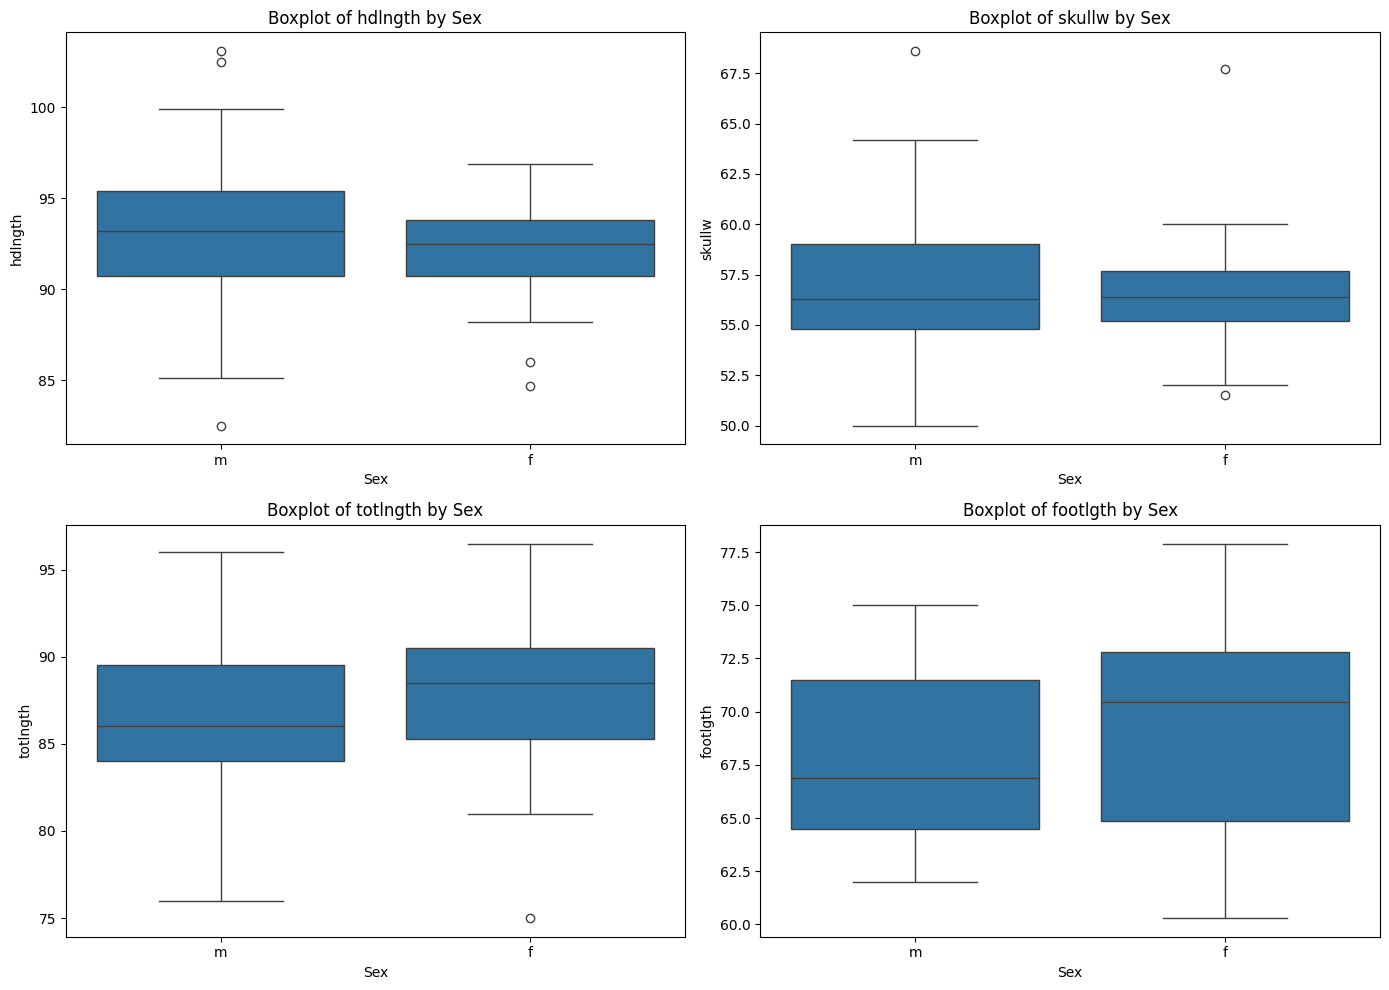

In [12]:
selected_features = ['hdlngth', 'skullw', 'totlngth', 'footlgth']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='sex', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Sex')
    plt.xlabel('Sex')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()